In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style='whitegrid')
sns.set_palette('bright')
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy import fftpack
import datetime
from sklearn import mixture
import warnings
warnings.filterwarnings('ignore')
from scipy import fft
from scipy import signal
import math
from acoustics.cepstrum import complex_cepstrum
from acoustics.cepstrum import inverse_complex_cepstrum
from scipy.spatial import distance

Text(0.5, 1.0, 'Data')

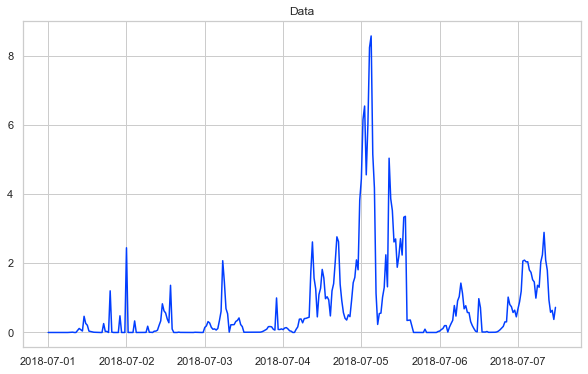

In [2]:
df = pd.read_csv(r"C:\Users\admin\Documents\Algo Asylum\Precipitation_Analysis\preci_all.csv")
df.columns = ['Date','ddate','value','geo']
df['Date'] = df['Date'].astype(str).str[:-2].astype(str)
df['Date'].iloc[43]
df.columns
df['Date'] = pd.to_datetime(df['Date'],format='%Y%m%d%H%M')
del df['ddate'],df['geo']
#plt.show()
sd = df.loc[(df['Date'].between('2018-07-01 00:00:00', '2018-07-07 11:30:00', inclusive=True))]
#sd['Date'] = pd.to_datetime(sd['Date'])
#y['date'] = y.groupby(y['date'].dt.date).sum()
#sd = sd.iloc[:, 1:]
s = sd['value']
t = sd['Date']
plt.figure(figsize=(10,6))
plt.plot(t, s)
plt.title("Data")

Text(0.5, 1.0, 'Data')

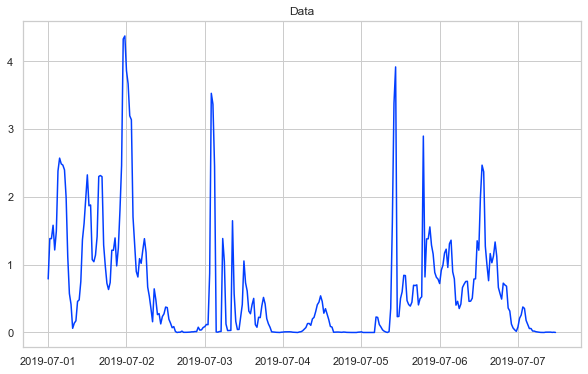

In [3]:
df1 = pd.read_csv(r"C:\Users\admin\Documents\Algo Asylum\Precipitation_Analysis\preci_all.csv")
df1.columns = ['Date','ddate','value','geo']
df1['Date'] = df1['Date'].astype(str).str[:-2].astype(str)
df1['Date'].iloc[43]
df1.columns
df1['Date'] = pd.to_datetime(df1['Date'],format='%Y%m%d%H%M')
del df1['ddate'],df1['geo']
#plt.show()
sd1 = df1.loc[(df1['Date'].between('2019-07-01 00:00:00', '2019-07-07 11:30:00', inclusive=True))]
#sd['Date'] = pd.to_datetime(sd['Date'])
#y['date'] = y.groupby(y['date'].dt.date).sum()
#sd = sd.iloc[:, 1:]
s2 = sd1['value']
t2 = sd1['Date']
plt.figure(figsize=(10,6))
plt.plot(t2, s2)
plt.title("Data")

Text(0.5, 1.0, 'Data')

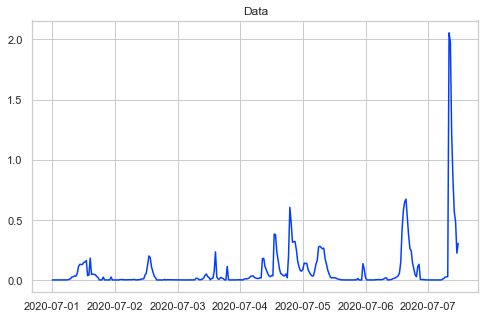

In [2]:
df2 = pd.read_csv(r"C:\Users\admin\Documents\Algo Asylum\Precipitation_Analysis\preci_all.csv")
df2.columns = ['Date','ddate','value','geo']
df2['Date'] = df2['Date'].astype(str).str[:-2].astype(str)
df2['Date'].iloc[43]
df2.columns
df2['Date'] = pd.to_datetime(df2['Date'],format='%Y%m%d%H%M')
del df2['ddate'],df2['geo']
#plt.show()
sd2 = df2.loc[(df2['Date'].between('2020-07-01 00:00:00', '2020-07-07 11:30:00', inclusive=True))]
#sd['Date'] = pd.to_datetime(sd['Date'])
#y['date'] = y.groupby(y['date'].dt.date).sum()
#sd = sd.iloc[:, 1:]
s3 = sd2['value']
t3 = sd2['Date']
plt.figure(figsize=(8,5))
plt.plot(t3, s3)
plt.title("Data")

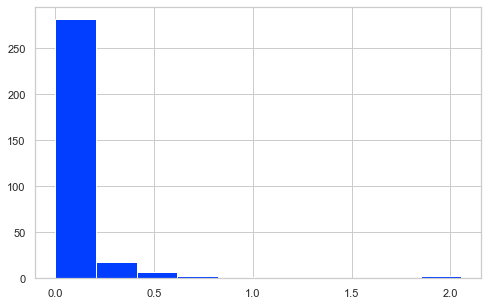

In [5]:
plt.figure(figsize=(8,5))
plt.hist(s3)
plt.show()

In [5]:
print(np.shape(s))
print(np.shape(s2))
print(np.shape(s3))

(312,)
(312,)
(312,)


In [6]:
from scipy.stats import wasserstein_distance

In [7]:
tf1 = np.arange(s.shape[0])
signal_1 = pd.DataFrame(zip(tf1,s),columns=['Time','Value'])
tf2 = np.arange(s2.shape[0])
signal_2 = pd.DataFrame(zip(tf2,s2),columns=['Time','Value'])
tf3 = np.arange(s3.shape[0])
signal_3 = pd.DataFrame(zip(tf3,s3),columns=['Time','Value'])

In [8]:
signal_2.equals(signal_3)

False

In [9]:
def jaccard(dff, dfj):
    a = 0
    intersect =[]
    union = []
    n1 = np.array(dff.Value)
    n2 = np.array(dfj.Value)
    n1 = np.append(n1,n2.max())
    n1 = np.append(n1,n2.min())
    n2 = np.append(n2,n1.max())
    n2 = np.append(n2,n1.min())
    count1, bin_edges1 = np.histogram(n2, bins=20)
    count2, bin_edges2 = np.histogram(n1, bins=20)

    for x in range(count1.shape[0]):
        intersect.append(min(count1[x],count2[x]))
    intersect = np.array([intersect])
    isum = intersect.sum()

    for x in range(count1.shape[0]):
        union.append(max(count1[x],count2[x]))
    union = np.array([union])
    usum = union.sum()

    jacc1 = isum/usum
            #x = wasserstein_distance(dff.value,dfj.value)
    a = jacc1
    return a

# FFT - Real and Imag

In [10]:
def freq(df):
    N = df.shape[0]
    y = np.array(df['Value'])
    f = fftpack.fftfreq(len(y))
    yf = fftpack.fft(y)
    fft_data1 = pd.DataFrame(zip(f,yf.real),columns=['Freq','Value'])
    fft_data2 = pd.DataFrame(zip(f,yf.imag),columns=['Freq','Value'])
    return fft_data1,fft_data2

In [11]:
freq_ampli1,freq_ampli1i = freq(signal_1)
freq_ampli2,freq_ampli2i = freq(signal_2)
freq_ampli3,freq_ampli3i = freq(signal_3)

# FFT - Magnitude and phase

In [12]:
#Func gives magnitude of FFT provide dataframe in Time Domain
def freq_mag(df):
    N = df.shape[0]
    y = np.array(df['Value'])
    f = fftpack.fftfreq(len(y))
    yf = fftpack.fft(y)
    fft_data = pd.DataFrame(zip(f,np.abs(yf)),columns=['Freq','Value'])
    return fft_data

In [13]:
def freq_phase(df):
    N = df.shape[0]
    y = np.array(df['Value'])
    f = fftpack.fftfreq(len(y))
    yf = fftpack.fft(y)
    fft_data1 = pd.DataFrame(zip(f,np.angle(yf)),columns=['Freq','Value'])
    return fft_data1

In [14]:
freq_ampli_mag1 = freq_mag(signal_1)
freq_ampli_phase1 = freq_phase(signal_1)
freq_ampli_mag2 = freq_mag(signal_2)
freq_ampli_phase2 = freq_phase(signal_2)
freq_ampli_mag3 = freq_mag(signal_3)
freq_ampli_phase3 = freq_phase(signal_3)

# Cepstrum

In [15]:
from acoustics.cepstrum import complex_cepstrum
from acoustics.cepstrum import inverse_complex_cepstrum

In [16]:
duration = signal_1.shape[0]
fs = 1.0
samples = int(fs*duration)
t = np.arange(samples) / fs
ceps1, _ = complex_cepstrum(signal_1['Value'])
print(ceps1)

[ 2.11248074e+00 -1.22187144e+01  1.38356384e+00 -5.00840404e-03
  3.96734788e-01  2.14663710e-01 -5.69148589e-01 -3.15810532e-01
  7.99933573e-01 -4.81726300e-01  2.08716646e+00 -4.28122315e-02
 -5.66957838e-01 -1.60766260e-01  9.27417335e-02 -3.44678415e-01
 -3.16778284e-01 -3.23637977e-02  2.16494922e-01 -3.41441358e-01
 -4.15684866e-01 -2.33109833e-01 -1.25311882e-01 -6.28911095e-02
  4.15418914e-01 -3.35520792e-01  6.53665783e-02  4.22562999e-01
 -2.63071160e-01  5.20884498e-02 -3.36246212e-01 -3.79423889e-02
 -2.66715978e-01  1.69855865e-01  1.32781540e-01 -1.29326633e-02
  3.20748077e-02  7.55639979e-02  1.01810797e-02 -5.53735173e-02
 -1.68679923e-01 -1.37761940e-01 -6.02866078e-02  1.81667411e-02
 -7.23359544e-02  3.40157367e-02  1.81180166e-02 -1.84167961e-02
  5.45035448e-02 -2.06594941e-01 -1.90587217e-01  4.94358173e-02
  4.53625352e-02  4.76192122e-02  1.89578535e-01 -6.56931404e-02
  1.65951330e-01 -2.08423350e-02 -9.77315519e-02  1.51840991e-01
 -1.88829098e-02 -4.51229

In [17]:
duration = signal_2.shape[0]
fs = 1.0
samples = int(fs*duration)
t = np.arange(samples) / fs
ceps2, _ = complex_cepstrum(signal_2['Value'])
print(ceps2)

[ 1.82084654e+00  9.61386557e+00  1.41142088e+00  2.03435898e+00
 -2.25928768e+00  9.92128251e-01 -2.07507331e-01  1.46359690e+00
  1.14717051e+00  3.37735665e-02 -1.24669807e-01 -2.98265523e-01
  1.52856131e-01  8.63314300e-01 -4.56836892e-01  2.74217141e-01
  7.85121883e-01 -1.72797381e+00  5.98723750e-02  4.29597126e-01
  3.72167611e-01 -2.87251712e-02 -3.36904963e-01 -9.18630552e-03
  7.77071286e-02  3.43355929e-01  1.36682692e-01  3.27893142e-02
 -2.15821806e-01 -1.54634740e-01 -8.89320703e-02 -8.01245209e-02
 -1.66924890e-02 -1.44538523e-01 -8.10993198e-02 -6.25170574e-02
 -2.03576233e-01 -5.95887788e-02  1.09573005e-01  2.08227329e-01
  1.86801450e-01  7.17728724e-02  2.29712592e-01 -7.21799891e-02
 -7.68210301e-02  6.92514028e-02 -1.34471691e-01 -1.93057592e-01
 -6.66834173e-02  1.19134005e-01  3.36553107e-03  1.63069518e-01
 -3.54562573e-02 -3.52658549e-02  1.01982933e-01  1.49915199e-02
 -7.37225588e-02 -6.66819792e-02  1.38015604e-01 -5.88894797e-02
  9.70525938e-02  7.54143

In [18]:
duration = signal_3.shape[0]
fs = 1.0
samples = int(fs*duration)
t = np.arange(samples) / fs
ceps3, _ = complex_cepstrum(signal_3['Value'])
print(ceps3)

[ 7.13362517e-01  9.51161178e-01  1.17894951e-01  1.11238872e-01
  2.48482745e-02  6.56525624e-02 -6.13874098e-02  8.43103042e-02
 -1.44024904e-01  4.46233040e-02 -3.86558828e-02  3.72505125e-03
  3.30364654e-03 -5.99472857e-03 -2.44243384e-02  5.15228458e-03
 -3.43637596e-02 -2.84409480e-03 -1.90677409e-02 -1.78490971e-02
 -8.96572456e-03 -8.31656877e-04 -1.39119074e-02  2.26296745e-03
 -1.68061419e-02 -2.73426266e-03 -1.63579470e-02  3.67816488e-03
  1.91167364e-02  1.35530590e-02  7.94692809e-03  2.68568236e-02
  2.87882395e-02  2.22857938e-02  3.31595732e-02 -4.29306436e-02
  2.98657967e-02  7.28240972e-02 -4.31449155e-02  3.50176589e-02
  1.26478232e-02  1.02194323e-02  1.43944659e-02  7.72259107e-03
 -1.57342844e-02  1.57064152e-02 -1.69125825e-02  1.29720596e-02
 -6.34858946e-03  1.40893552e-02  8.52963692e-03  2.09674758e-02
  1.21455356e-02  3.85944107e-02  1.01642637e-02  1.89046882e-02
 -1.01122911e-02  3.08232808e-02  1.71392350e-02  1.71120888e-02
  1.53710976e-02  2.54193

In [19]:
cepstrum1 = pd.DataFrame(ceps1,columns=['Value'])
cepstrum2 = pd.DataFrame(ceps2,columns=['Value'])
cepstrum3 = pd.DataFrame(ceps3,columns=['Value'])

## Results

In [20]:
from prettytable import PrettyTable

In [21]:
print('Signal 1 sum - ', signal_1['Value'].sum())
print('Signal 2 sum - ', signal_2['Value'].sum())
print('Signal 3 sum - ', signal_3['Value'].sum())

Signal 1 sum -  220.08369124155527
Signal 2 sum -  203.7512893764956
Signal 3 sum -  24.406549158168627


In [22]:
print('Signal 1 zero count - ', signal_1["Value"].isin([0]).sum())
print('Signal 2 zero count - ', signal_2["Value"].isin([0]).sum())
print('Signal 3 zero count - ', signal_3["Value"].isin([0]).sum())

Signal 1 zero count -  20
Signal 2 zero count -  13
Signal 3 zero count -  57


In [23]:
table0 = PrettyTable(['Signal 1', 'Signal 2', 'Signal 3'])
table0.add_row([signal_1['Value'].describe(),signal_2['Value'].describe(),signal_3['Value'].describe()])
print(table0)

+-----------------------------+-----------------------------+-----------------------------+
|           Signal 1          |           Signal 2          |           Signal 3          |
+-----------------------------+-----------------------------+-----------------------------+
|     count    312.000000     |     count    312.000000     |     count    312.000000     |
|     mean       0.705396     |     mean       0.653049     |     mean       0.078226     |
|     std        1.255032     |     std        0.849673     |     std        0.209229     |
|     min        0.000000     |     min        0.000000     |     min        0.000000     |
|     25%        0.004851     |     25%        0.016322     |     25%        0.000212     |
|     50%        0.170968     |     50%        0.355716     |     50%        0.010567     |
|     75%        0.915154     |     75%        0.986530     |     75%        0.055074     |
|     max        8.587481     |     max        4.376400     |     max        2.0

+-----------+-----------+-----------+---------------+---------------+---------------+
| EMD (1-2) | EMD (2-3) | EMD (1-3) | Jaccard (1-2) | Jaccard (2-3) | Jaccard (1-3) |
+-----------+-----------+-----------+---------------+---------------+---------------+
|   0.1956  |  0.57482  |  0.62717  |    0.71585    |    0.35931    |    0.51691    |
+-----------+-----------+-----------+---------------+---------------+---------------+


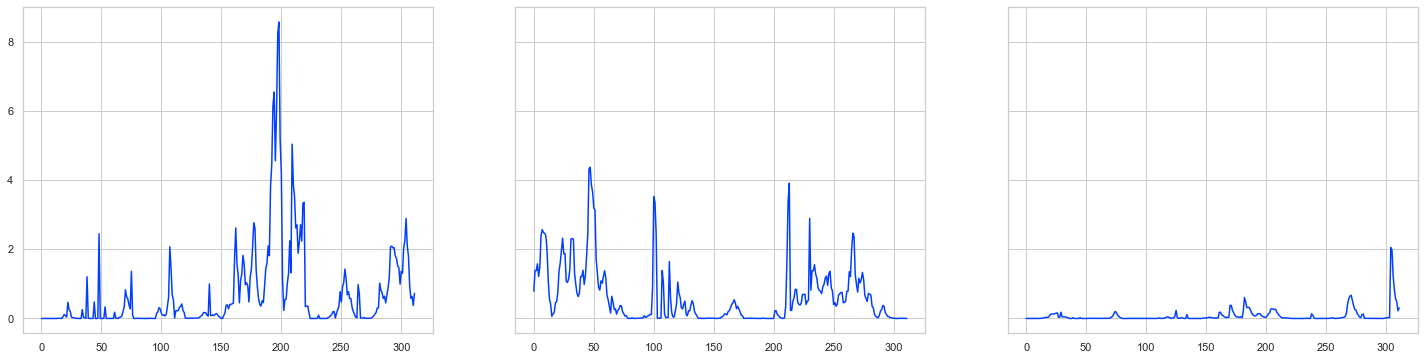

In [24]:
fig, axs = plt.subplots(1,3,figsize=(25,6), sharex=True, sharey=True)
axs[0].plot(signal_1["Time"],signal_1['Value'])
axs[1].plot(signal_2["Time"],signal_2['Value'])
axs[2].plot(signal_3["Time"],signal_3['Value'])
table = PrettyTable(['EMD (1-2)', 'EMD (2-3)', 'EMD (1-3)','Jaccard (1-2)', 'Jaccard (2-3)', 'Jaccard (1-3)'])
table.add_row([np.round(wasserstein_distance(s,s2),5),np.round(wasserstein_distance(s2,s3), 5), np.round(wasserstein_distance(s,s3), 5), np.round(jaccard(signal_1,signal_2), 5), np.round(jaccard(signal_2,signal_3), 5), np.round(jaccard(signal_1,signal_3), 5)])
print(table)

+-----------+-----------+-----------+---------------+---------------+---------------+
| EMD (1-2) | EMD (2-3) | EMD (1-3) | Jaccard (1-2) | Jaccard (2-3) | Jaccard (1-3) |
+-----------+-----------+-----------+---------------+---------------+---------------+
|  1.73704  |  5.82117  |  7.31854  |    0.74444    |    0.53922    |    0.46047    |
|  3.58771  |  3.64777  |  7.23424  |    0.81503    |    0.70652    |    0.66138    |
+-----------+-----------+-----------+---------------+---------------+---------------+


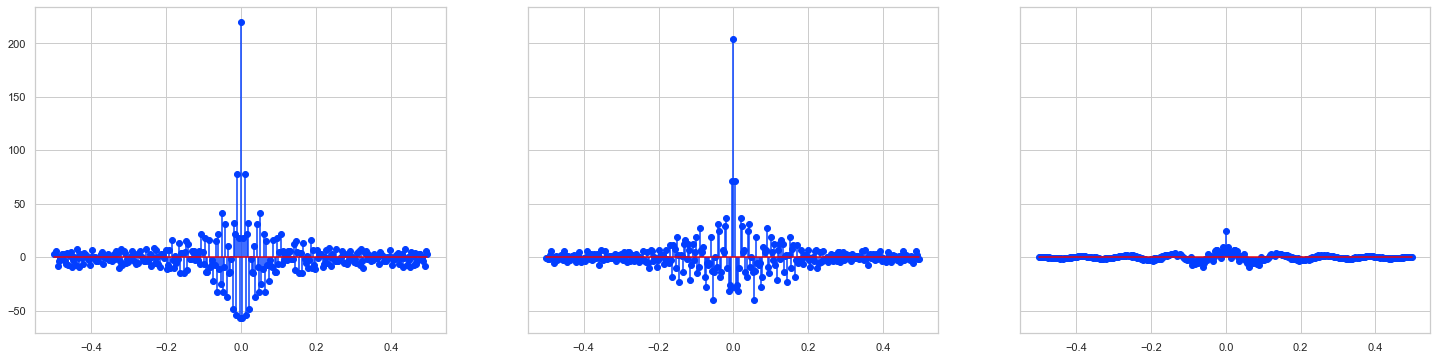

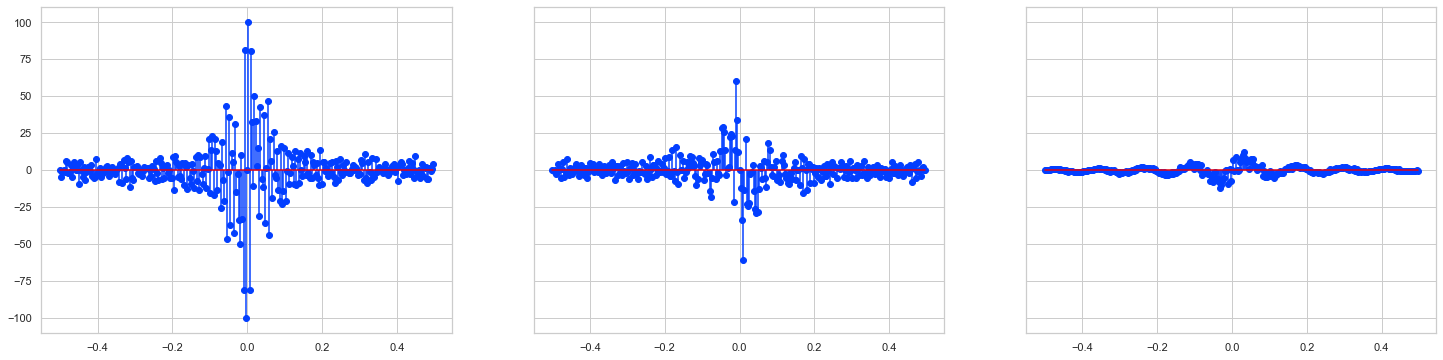

In [25]:
fig, axs = plt.subplots(1,3,figsize=(25,6),sharex=True, sharey=True)
axs[0].stem(freq_ampli1['Freq'], freq_ampli1['Value'])
#axs[0].set_xlim(-0.1, 0.1)
axs[1].stem(freq_ampli2['Freq'], freq_ampli2['Value'])
#axs[1].set_xlim(-0.1, 0.1)
axs[2].stem(freq_ampli3['Freq'], freq_ampli3['Value'])

fig, axs = plt.subplots(1,3,figsize=(25,6),sharex=True, sharey=True)
axs[0].stem(freq_ampli1i['Freq'], freq_ampli1i['Value'])
axs[1].stem(freq_ampli2i['Freq'], freq_ampli2i['Value'])
axs[2].stem(freq_ampli3i['Freq'], freq_ampli3i['Value'])

table2 = PrettyTable(['EMD (1-2)', 'EMD (2-3)', 'EMD (1-3)','Jaccard (1-2)', 'Jaccard (2-3)', 'Jaccard (1-3)'])
table2.add_row([np.round(wasserstein_distance(freq_ampli1['Value'],freq_ampli2['Value']),5),np.round(wasserstein_distance(freq_ampli2['Value'],freq_ampli3['Value']), 5), np.round(wasserstein_distance(freq_ampli1['Value'],freq_ampli3['Value']), 5), np.round(jaccard(freq_ampli1,freq_ampli2), 5), np.round(jaccard(freq_ampli2,freq_ampli3), 5), np.round(jaccard(freq_ampli1,freq_ampli3), 5)])
table2.add_row([np.round(wasserstein_distance(freq_ampli1i['Value'],freq_ampli2i['Value']),5),np.round(wasserstein_distance(freq_ampli2i['Value'],freq_ampli3i['Value']), 5), np.round(wasserstein_distance(freq_ampli1i['Value'],freq_ampli3i['Value']), 5), np.round(jaccard(freq_ampli1i,freq_ampli2i), 5), np.round(jaccard(freq_ampli2i,freq_ampli3i), 5), np.round(jaccard(freq_ampli1i,freq_ampli3i), 5)])
print(table2)

+-----------+-----------+-----------+---------------+---------------+---------------+
| EMD (1-2) | EMD (2-3) | EMD (1-3) | Jaccard (1-2) | Jaccard (2-3) | Jaccard (1-3) |
+-----------+-----------+-----------+---------------+---------------+---------------+
|  3.74657  |  7.53414  |  11.27803 |    0.84706    |    0.61856    |     0.5468    |
|  0.06424  |  0.06134  |  0.05467  |    0.79429    |    0.77904    |     0.8046    |
+-----------+-----------+-----------+---------------+---------------+---------------+


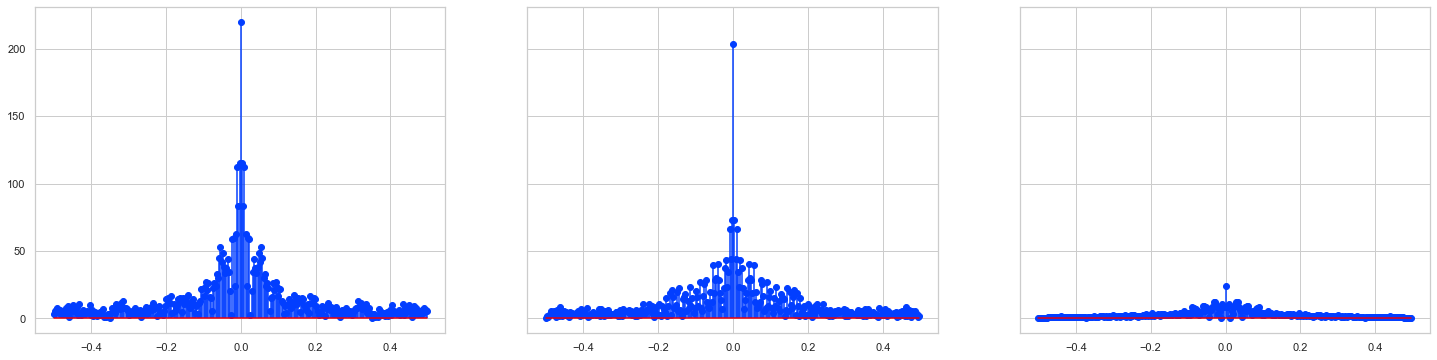

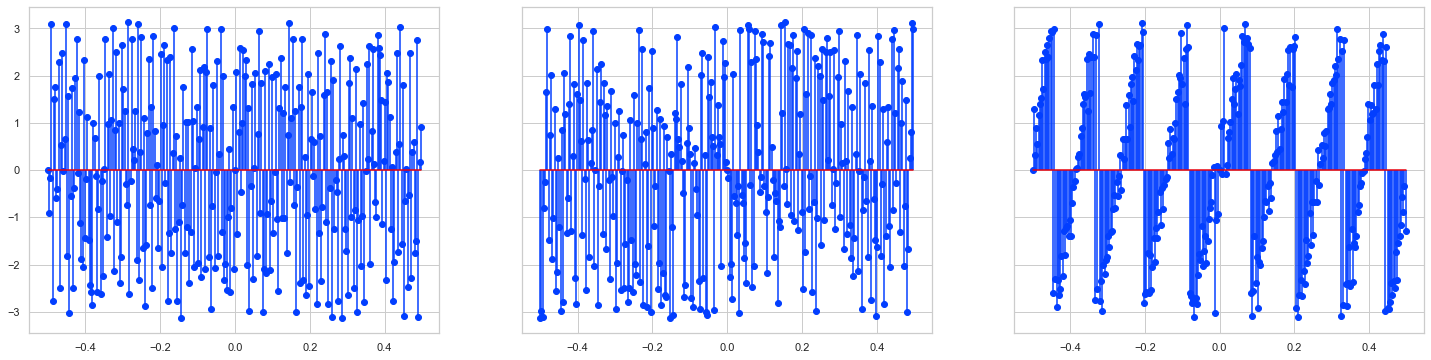

In [26]:
fig, axs = plt.subplots(1,3,figsize=(25,6), sharex=True, sharey=True)
axs[0].stem(freq_ampli_mag1['Freq'], freq_ampli_mag1['Value'])
#axs[0].set_xlim(-0.1, 0.1)
axs[1].stem(freq_ampli_mag2['Freq'], freq_ampli_mag2['Value'])
#axs[1].set_xlim(-0.1, 0.1)
axs[2].stem(freq_ampli_mag3['Freq'], freq_ampli_mag3['Value'])

fig, axs = plt.subplots(1,3,figsize=(25,6),sharex=True, sharey=True)
axs[0].stem(freq_ampli_phase1['Freq'], freq_ampli_phase1['Value'])
axs[1].stem(freq_ampli_phase2['Freq'], freq_ampli_phase2['Value'])
axs[2].stem(freq_ampli_phase3['Freq'], freq_ampli_phase3['Value'])

table3 = PrettyTable(['EMD (1-2)', 'EMD (2-3)', 'EMD (1-3)','Jaccard (1-2)', 'Jaccard (2-3)', 'Jaccard (1-3)'])
table3.add_row([np.round(wasserstein_distance(freq_ampli_mag1['Value'],freq_ampli_mag2['Value']),5),np.round(wasserstein_distance(freq_ampli_mag2['Value'],freq_ampli_mag3['Value']), 5), np.round(wasserstein_distance(freq_ampli_mag1['Value'],freq_ampli_mag3['Value']), 5), np.round(jaccard(freq_ampli_mag1,freq_ampli_mag2), 5), np.round(jaccard(freq_ampli_mag2,freq_ampli_mag3), 5), np.round(jaccard(freq_ampli_mag1,freq_ampli_mag3), 5)])
table3.add_row([np.round(wasserstein_distance(freq_ampli_phase1['Value'],freq_ampli_phase2['Value']),5),np.round(wasserstein_distance(freq_ampli_phase2['Value'],freq_ampli_phase3['Value']), 5), np.round(wasserstein_distance(freq_ampli_phase1['Value'],freq_ampli_phase3['Value']), 5), np.round(jaccard(freq_ampli_phase1,freq_ampli_phase2), 5), np.round(jaccard(freq_ampli_phase2,freq_ampli_phase3), 5), np.round(jaccard(freq_ampli_phase1,freq_ampli_phase3), 5)])
print(table3)

+-----------+-----------+-----------+---------------+---------------+---------------+
| EMD (1-2) | EMD (2-3) | EMD (1-3) | Jaccard (1-2) | Jaccard (2-3) | Jaccard (1-3) |
+-----------+-----------+-----------+---------------+---------------+---------------+
|  0.06521  |  0.18834  |  0.18366  |    0.95031    |    0.88024    |    0.93827    |
+-----------+-----------+-----------+---------------+---------------+---------------+


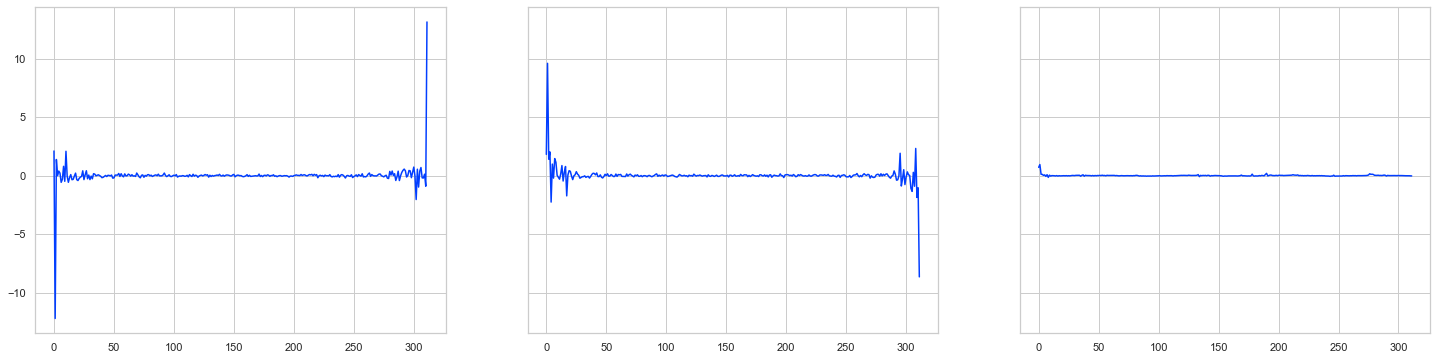

In [27]:
fig, axs = plt.subplots(1,3,figsize=(25,6), sharex = True, sharey = True)
axs[0].plot(ceps1)
axs[1].plot(ceps2)
axs[2].plot(ceps3)
table4 = PrettyTable(['EMD (1-2)', 'EMD (2-3)', 'EMD (1-3)','Jaccard (1-2)', 'Jaccard (2-3)', 'Jaccard (1-3)'])
table4.add_row([np.round(wasserstein_distance(ceps1,ceps2), 5), np.round(wasserstein_distance(ceps2,ceps3), 5), np.round(wasserstein_distance(ceps1,ceps3),5), np.round(jaccard(cepstrum1,cepstrum2),5), np.round(jaccard(cepstrum2,cepstrum3),5), np.round(jaccard(cepstrum1,cepstrum3),5)])
print(table4)